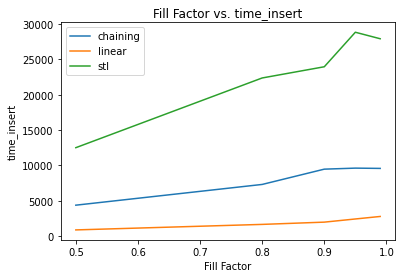

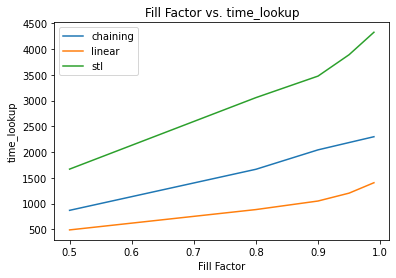

In [99]:
import simexpal
import yaml
import matplotlib.pyplot as plt

cfg = simexpal.config_for_dir()

results = []
for run in cfg.collect_successful_results():
    with run.open_output_file() as f:
        yml = yaml.load(f, Loader=yaml.SafeLoader)
    results.append(yml)

results= sorted(results, key=lambda r: (r['algo'], r['fill_factor']))   

def getValues(key, algo):
    return [result[key] for result in results if result['algo'] == algo]

algos = ['chaining', 'linear', 'stl', 'quadratic','bucket_cuckoo']
keys = ['time_insert', 'time_lookup']

for key in keys:
    plt.clf()
    for algo in algos:
        # plotting the lines
        plt.plot(getValues('fill_factor', algo), getValues(key, algo), label = algo)
        
    #set labels
    plt.xlabel('Fill Factor')
    plt.ylabel(key)
    # Set title
    plt.title('Fill Factor vs. '+key)
    # show a legend on the plot
    plt.legend()
    # Display a figure.
    #plt.show()
    
    plt.savefig('3b) - '+key+'.png')
    plt.savefig('3b) - '+key+'.pdf')